In [120]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.signal import find_peaks,peak_widths
from skimage import exposure
from skimage.restoration import denoise_tv_chambolle,estimate_sigma

([], <a list of 0 Text yticklabel objects>)

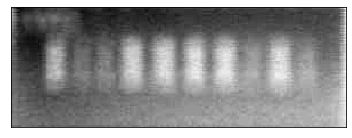

In [176]:
npImage=np.array(Image.open("./BarCode New/BarCode New/1WS_2D_Scan/f3_IMAG 1,60MHz 23,0dB_1WS_top_2_3B17_cropped.JPG").convert("L"))
plt.imshow(npImage,cmap="gray")
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

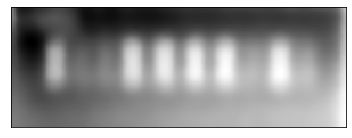

In [165]:
# npImage_tv_denoised = denoise_tv_chambolle(npImage,weight=0.10,multichannel=False)
# plt.imshow(npImage_tv_denoised,cmap="gray",interpolation="nearest")
# plt.xticks([])
# plt.yticks([])

In [177]:
sigma_est = estimate_sigma(npImage,multichannel=False,average_sigmas=True)
sigma_est

0.27798791596980627

([], <a list of 0 Text yticklabel objects>)

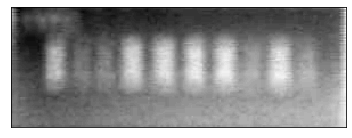

In [179]:
gauss_denoised = ndimage.gaussian_filter(npImage, sigma_est)#,sigma_est)

plt.imshow(gauss_denoised, cmap="gray",interpolation="nearest")
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

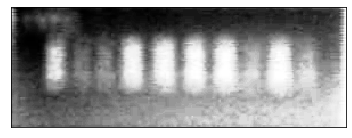

In [180]:
image_equalized = exposure.equalize_hist(gauss_denoised)

plt.imshow(image_equalized, cmap="gray",interpolation="nearest")
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

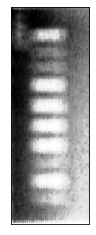

In [181]:
image_equalized_rotated = np.transpose(255 * image_equalized)
plt.imshow(image_equalized_rotated, cmap="gray",interpolation="nearest")
plt.xticks([])
plt.yticks([])

In [182]:
middle_col_image_index = (int) (image_equalized_rotated.shape[1]/2)
print(middle_col_image_index)

53


([], <a list of 0 Text yticklabel objects>)

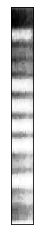

In [204]:
middle_col_img = np.array(image_equalized_rotated[:,middle_col_image_index-15:middle_col_image_index+15])

plt.imshow(middle_col_img,cmap="gray",interpolation="nearest")
plt.xticks([])
plt.yticks([])

In [207]:
middle_col_img_avg = np.average(middle_col_img,axis=1)
max_value = np.max(middle_col_img_avg);
peaks = find_peaks(middle_col_img_avg,height=(100,max_value),distance=11,prominence=5)
graph_widths = peak_widths(middle_col_img_avg, peaks[0])#, rel_height=0.3)

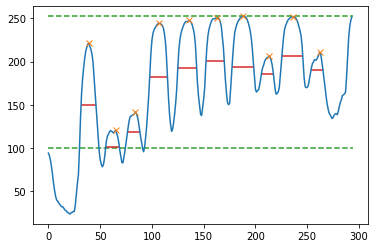

In [208]:
plt.plot(middle_col_img_avg)
plt.hlines(max_value,0,middle_col_img_avg.shape[0],colors="C2",linestyles="dashed")
plt.hlines(100,0,middle_col_img_avg.shape[0],colors="C2",linestyles="dashed")
plt.hlines(*graph_widths[1:], color="C3")
plt.plot(peaks[0],middle_col_img_avg[peaks[0]],'x')

In [209]:
width_average = np.average(graph_widths[0])

In [210]:
code = np.array(())
for width in graph_widths[0]:
    if(width  < width_average):
        code = np.append(code,0)
    else:
        code = np.append(code,1)
print(code.astype(int))


[0 0 0 1 1 1 1 0 1 0]
